In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
import math

In [2]:
#############################################
#
# Fixed settings
#
common_settings = {# fixed LambdaCDM parameters
                   # 'h':0.67810,
                   # 'A_s':2.100549e-09,
                   # 'n_s':0.9660499,
                   # 'tau_reio':0.05430842,
                   # parameters ncdm
                   'ksi_ncdm': 0.0,
                   'N_ncdm': 1.0,
                   'm_ncdm': 1.0,
                   'deg_ncdm': 3.0,
                   # 'Omega_ncdm': 0.25,
                   # 'Omega_cdm': 0.0,
                   'ncdm_psd_parameters': '0.018, 1.0, 10.5',
                   # output and precision parameters
                   'output':'tCl,pCl,lCl,mPk',
                   # 'output':'mPk',
                   'lensing':'yes',
                   'P_k_max_1/Mpc':1.0,
                   'YHe': 0.2448, #so that it computes large DeltaN, I don't think it matters much 
                  }  
#
##############################################

In [3]:
M = {}
background = {}
N_eff = 0
N_eff_paiper = 3.98486
N_eff_standard = 3.044 

for i in range(0,2):
    M[i] = Class()
    M[i].set(common_settings)
    if i == 0:
        M[i].set({'ncdm_psd_parameters': '0.018, 1.0, 10.5'})
    else:
        M[i].set({'ncdm_psd_parameters': '0.0, 1.0, 0.0'})
        M[i].set({'N_ur': N_eff})


    M[i].compute()
    # load background table
    background[i] = M[i].get_background()

    # print info
    N_ur = M[i].get_current_derived_parameters(['Neff'])['Neff']
    h = M[i].get_current_derived_parameters(['h'])['h']

    print (' * Compute with %s=%e, %s=%e, %s=%e'%('N_eff',N_ur, 'N_eff_paiper', N_eff_paiper, 'h', h))

    # we have to a little manipulate the value of `N_eff` in second case 
    if i == 0:
        N_eff = N_ur - N_eff_standard

 * Compute with N_eff=7.081436e+00, N_eff_paiper=3.984860e+00, h=6.781000e-01
 * Compute with N_eff=7.077030e+00, N_eff_paiper=3.984860e+00, h=6.781000e-01


### Plotting: base definition

In [4]:
#############################################
#
# extract spectra and find function
#
#############################################
h = M[0].get_current_derived_parameters(['h'])['h']
karr = np.logspace(-4,np.log10(1),1000) # array of k in h/Mpc
kharr = karr*h # This is k in 1/Mpc

def find_matter_power_spectra(_M, _kh_arr):
    h = _M.get_current_derived_parameters(['h'])['h']
    pk_arr = np.array([])
    
    for _kh in _kh_arr:
        pk = _M.pk(_kh,0.)*h**3
        pk_arr = np.append(pk_arr, pk)
    
    return pk_arr

In [5]:
# esthetic definitions for the plots%s=%e
font = {'size'   : 24, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
#matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

### Plot matter power spectra

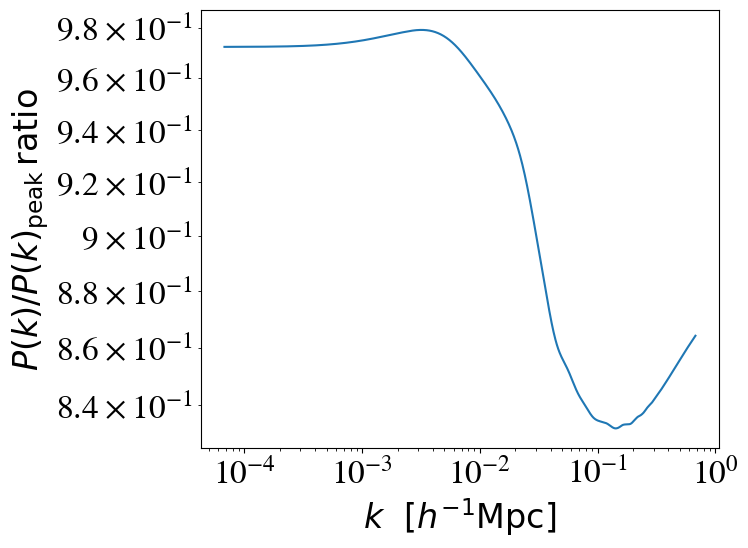

In [6]:
# --- Create figures
fig_Pk, ax_Pk = plt.subplots()

# --- loop over varying parameter values
pkM = {}

for i in range(0, 2):
    pkM[i] = find_matter_power_spectra(M[i], kharr)

# --- plotting
ax_Pk.loglog(kharr, pkM[0]/pkM[1], linestyle='-')

#ax_Pk.set_xlim([1.e-3,3.])
#ax_Pk.set_ylim([0.98,1.20])
ax_Pk.set_xlabel(r'$k \,\,\,\, [h^{-1}\mathrm{Mpc}]$')
ax_Pk.set_ylabel(r'$P(k)/P(k)_{\mathrm{peak}} \, \mathrm{ratio}$')
#ax_Pk.legend(loc='upper left')
fig_Pk.tight_layout()
#fig_Pk.savefig('ratio-%s-Pk.pdf' % var_figname)

plt.show()
plt.close()

### Plot CMB power spectra

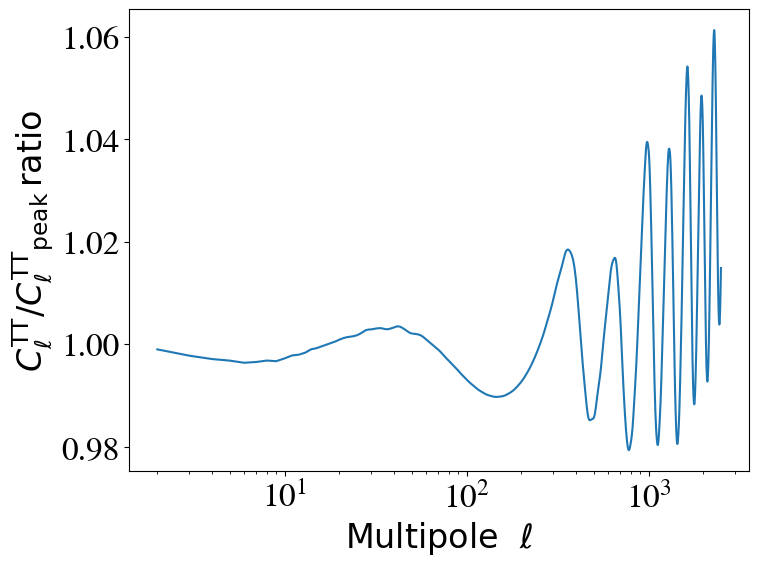

In [7]:
# --- Create figures
fig_TT, ax_TT = plt.subplots()

# --- loop over varying parameter values
ll = {}
clM = {}
clTT = {}

for i in range(0, 2):
    clM[i] = M[i].lensed_cl(2500)
    ll[i] = clM[i]['ell'][2:]
    clTT[i] = clM[i]['tt'][2:]

# print("ll[0]:",ll[0])
# print("ll[1]:",ll[1])
# print("clTT[0]:", clTT[0])
# print("clTT[1]:", clTT[1])
# print("len(clTT[0]):", len(clTT[0]))
# print("len(clTT[1]):", len(clTT[1]))

ratioCllarr = np.array([])
for i in range(0, len(ll[0])):
    ratioCll = clTT[1][i] / clTT[0][i]
    ratioCllarr = np.append(ratioCllarr, ratioCll)

# print("ratioCllarr:", ratioCllarr)

# --- plotting
ax_TT.semilogx(ll[0], ratioCllarr, linestyle='-')

#ax_TT.set_xlim([2,2500])
#ax_TT.set_ylim([0.850,1.005])
ax_TT.set_xlabel(r'$\mathrm{Multipole} \,\,\,\,  \ell$')
ax_TT.set_ylabel(r'$C_\ell^\mathrm{TT}/{C_\ell^\mathrm{TT}}_{\mathrm{peak}} \, \mathrm{ratio}$')
#ax_TT.legend(loc='lower left')
# fig_TT.tight_layout()
#fig_TT.savefig('ratio-%s-cltt.pdf' % var_figname)

plt.show()
plt.close()